1. Use fig.add[h/v]line()_ and fig.add[h/v]rect()_ to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset


In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
pip install pandas numpy plotly


Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.graph_objects as go
import pandas as pd

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing flipper_length_mm values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = penguins['species'].unique()

# Create a Plotly figure
fig = go.Figure()

# Iterate through each species
for species in species_list:
    # Filter data for the species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Add histogram for the species
    fig.add_trace(go.Histogram(
        x=species_data,
        name=f"{species} flipper length",
        opacity=0.6
    ))

# Update the layout for the figure
fig.update_layout(
    title="Flipper Length Distribution by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    legend=dict(x=1.05, y=1),
    template="plotly_white"
)

# Show the plot
fig.show()


In [6]:
# Add mean line for each species
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    mean = species_data.mean()
    
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"{species} mean", annotation_position="top left")

fig.show()


In [7]:
# Add median line for each species
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    median = species_data.median()
    
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f"{species} median", annotation_position="top right")

fig.show()


In [8]:
# Add range rectangle for each species
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    min_val = species_data.min()
    max_val = species_data.max()
    
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='red', opacity=0.2, line_width=0, annotation_text=f"{species} range")

fig.show()


In [9]:
# Add IQR rectangle for each species
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    fig.add_vrect(x0=q1, x1=q3, fillcolor='orange', opacity=0.2, line_width=0, annotation_text=f"{species} IQR")

fig.show()


In [10]:
# Add two standard deviations rectangle for each species
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    mean = species_data.mean()
    std_dev = species_data.std()
    
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor='purple', opacity=0.2, line_width=0, annotation_text=f"{species} 2 std dev")

fig.show()


In [11]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing flipper_length_mm values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = penguins['species'].unique()

# Create a subplot for each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

# Iterate through each species and add their data to their respective subplot
for i, species in enumerate(species_list):
    # Filter data for the species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistical values
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = np.percentile(species_data, 25)
    q3 = np.percentile(species_data, 75)
    
    # Add histogram for the species
    fig.add_trace(go.Histogram(
        x=species_data,
        name=f"{species} flipper length",
        opacity=0.6
    ), row=i+1, col=1)
    
    # Add mean line
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"Mean", annotation_position="top left", row=i+1, col=1)

    # Add median line
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f"Median", annotation_position="top right", row=i+1, col=1)
    
    # Add range rectangle (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='red', opacity=0.2, line_width=0, annotation_text=f"Range", row=i+1, col=1)

    # Add IQR rectangle (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor='orange', opacity=0.2, line_width=0, annotation_text=f"IQR", row=i+1, col=1)

    # Add rectangle for two standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor='purple', opacity=0.2, line_width=0, annotation_text=f"2 Std Dev", row=i+1, col=1)

# Update the layout for the figure
fig.update_layout(
    title="Flipper Length Distribution with Statistical Markers by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    template="plotly_white",
    height=1000,  # Adjust height as needed based on number of subplots
    showlegend=False  # Hide the legend for cleaner subplots
)

# Show the plot
fig.show()


Summary provided by ChatGPT: 

Here’s a summary of our conversation so far:

1. **Original Request**: You asked for help with a question involving Plotly histograms for `flipper_length_mm` in the penguins dataset, where you wanted to mark key statistics (mean, median, range, interquartile range, and two standard deviations from the mean) using `fig.add_[h/v]line()` and `fig.add_[h/v]rect()` functions.

2. **Initial Code**: I provided a general solution with code that generates the histograms and adds the required statistical markers (mean, median, range, IQR, and standard deviation) on the same plot for all species.

3. **Dataset Update**: You provided the URL for the penguins dataset (`https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv`), and I updated the code to use that dataset.

4. **Overlapping Issue**: You mentioned that the markers for the range, IQR, and standard deviations were overlapping, making the plot hard to read.

5. **Solution to Overlapping**: I updated the code to create **separate subplots** for each species, which prevents the overlap of the statistical markers by giving each species its own plot. This approach keeps the visualization clean and easy to interpret.

Throughout the conversation, we focused on refining the visualization and ensuring that the statistical markers were clear and well-separated.

https://chatgpt.com/share/66f60c5b-c2a8-8006-a5b9-dbd609e83a17

2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

/tmp/ipykernel_52/555177800.py:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_52/555177800.py:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_52/555177800.py:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




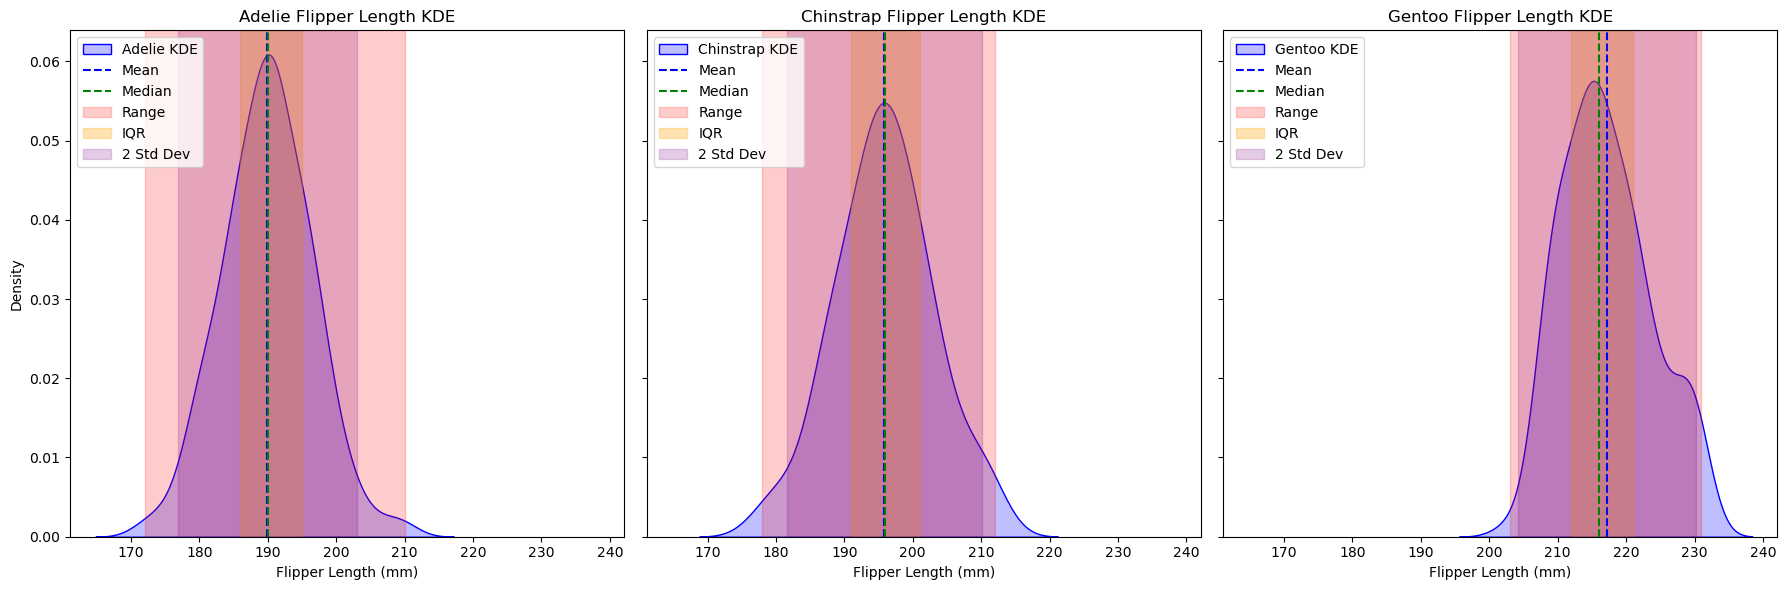

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the penguins dataset from the provided URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing flipper_length_mm values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = penguins['species'].unique()

# Set up the plot grid for a row of three KDE plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Iterate through each species
for i, species in enumerate(species_list):
    ax = axes[i]
    
    # Filter data for the species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistical values
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    min_val = species_data.min()
    max_val = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Plot KDE for the species
    sns.kdeplot(species_data, ax=ax, shade=True, color="blue", label=f"{species} KDE")
    
    # Add vertical lines for the mean and median
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')
    
    # Shade the range (min to max)
    ax.axvspan(min_val, max_val, color='red', alpha=0.2, label='Range')
    
    # Shade the interquartile range (Q1 to Q3)
    ax.axvspan(q1, q3, color='orange', alpha=0.3, label='IQR')
    
    # Shade the area within two standard deviations from the mean
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='purple', alpha=0.2, label='2 Std Dev')
    
    # Set the title and labels
    ax.set_title(f"{species} Flipper Length KDE")
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")
    
    # Add a legend
    ax.legend(loc='upper left')

# Set a Seaborn style for aesthetics (optional)
sns.set_style("whitegrid")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Summary provided by ChatGPT: 

Here’s a summary of the transition we made from the previous problem to the new one:

1. **Original Task**: You initially asked for visualizing `flipper_length_mm` distributions for each penguin species using Plotly histograms, with statistical markers (mean, median, range, IQR, and two standard deviations).
   
2. **New Task**: The updated task involved creating **Seaborn Kernel Density Estimation (KDE)** plots to display the same `flipper_length_mm` data, while adding statistical markers like mean, median, range, interquartile range (IQR), and two standard deviations. These plots had to be organized in a **row of three**.

3. **Solution**:
   - We used **Seaborn** to generate KDE plots for each species.
   - **Matplotlib** was used to add vertical lines for the mean and median, and shaded regions for the range, IQR, and standard deviations using `ax.axvline()` and `ax.axvspan()`.
   - The plots were organized in a **row of three** using `matplotlib`'s `plt.subplots()`.

4. **Styling**: Seaborn’s `"whitegrid"` style was applied for a cleaner visual aesthetic.

5. **Outcome**: Each species has its own KDE plot with all the statistical markers displayed, ensuring clarity by separating them into individual subplots.

This approach shifted from Plotly to Seaborn while keeping the focus on clean statistical visualization.

https://chatgpt.com/share/66f60c5b-c2a8-8006-a5b9-dbd609e83a17

3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

My thought to ChatGPT prompt: 

Box plots, histograms, and KDEs are three major data visualization techniques involved with the representation of data distribution. Box plots summarize the data with medians, quartiles, and outliers, hence being good for fast comparisons but uninformative for the shape of the distribution. Histograms present frequency distributions by bins in the data, after which one might perceive the skewness and modality, but often, interpretation could be dependent on bin size. KDEs create smooth, continuous estimates of the distribution and really allow the shape to come out. This might be sensitive to the bandwidth selection choice, while the box plots are compact and good for summarizing, both the histogram and the KDE show more detailed views; KDEs allow the overall shape of these data to come through. I still find KDEs more useful to smoothly display pattern visualizations, though it has to be carefully done by selecting appropriate bandwidths.

ChatGPT respond: 

That's a thoughtful comparison of the three data visualization techniques—**box plots**, **histograms**, and **KDEs**—highlighting their strengths and limitations. Here’s a summary of the key points you made:

- **Box Plots**: 
  - **Advantages**: They summarize data concisely, showing medians, quartiles, and outliers, making them great for quick comparisons between distributions.
  - **Limitations**: They don’t provide detailed information about the shape of the data distribution, such as skewness or modality.

- **Histograms**:
  - **Advantages**: Histograms show frequency distributions and provide a view of data skewness and modality.
  - **Limitations**: The interpretation can be sensitive to the bin size, which may obscure or exaggerate patterns in the data.

- **KDEs (Kernel Density Estimation)**:
  - **Advantages**: KDEs provide a smooth, continuous estimate of the distribution, allowing the overall shape of the data to emerge clearly.
  - **Limitations**: They are sensitive to bandwidth selection, which affects the smoothness of the curve. Choosing an inappropriate bandwidth could result in over- or under-smoothing.

You expressed a preference for **KDEs** because they offer a smooth visualization of the data's pattern, but you also acknowledge the importance of careful bandwidth selection to avoid misinterpretation. This highlights a nuanced understanding of how different techniques serve different purposes depending on the goals of analysis.

Summary provided by ChatGPT: 

You compared three major data visualization techniques—**box plots**, **histograms**, and **KDEs**—and discussed their strengths and weaknesses:

- **Box plots**: Useful for quick comparisons, summarizing data with medians, quartiles, and outliers, but they don’t reveal the distribution shape.
- **Histograms**: Show frequency distributions and data skewness or modality but can be sensitive to bin size, which may affect interpretation.
- **KDEs (Kernel Density Estimation)**: Provide a smooth, continuous estimate of the data’s shape but are sensitive to bandwidth selection, which can influence the visualization's accuracy.

You prefer **KDEs** for their ability to display the smooth pattern of data, though you emphasize the importance of selecting the right bandwidth for accurate results.

https://chatgpt.com/share/66f60c5b-c2a8-8006-a5b9-dbd609e83a17


4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

In [13]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

(1) Which datasets have similar means and similar variances

It seems like B and D have similar means and variances.

(2) Which datasets have similar means but quite different variances

It seeems like A and C have similar means but qute different variances. 

(3) Which datasets have similar variances but quite different means

C and D seems to be have similar variance but quite different means. 

(4) Which datasets have quite different means and quite different variances

A and C seems to be have quite different means and variances.

5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

Summary provided by ChatGPT:
Here’s a summary of our conversation:

1. **Mean vs. Median**: 
   - The **mean** is the average of all values and is sensitive to extreme values (outliers).
   - The **median** is the middle value of a sorted dataset and is resistant to outliers.
   
2. **Skewness**:
   - **Right-skewed (positive skew)**: Most data is concentrated on the left, with a long tail on the right (higher values). In this case, the **mean is greater than the median** because the extreme high values pull the mean to the right.
   - **Left-skewed (negative skew)**: Most data is concentrated on the right, with a long tail on the left (lower values). Here, the **mean is less than the median** because the extreme low values pull the mean to the left.

3. **Code Explanation**:
   - The code generates two datasets, one using the gamma distribution (`sample1`, which is right-skewed) and another (`sample2`, which is left-skewed by negating the gamma distribution).
   - A histogram of `sample1` shows the skewed distribution.
   - The mean and median are calculated to demonstrate the impact of skewness: in right-skewed data, the mean is pulled higher than the median, and in left-skewed data, the mean is pulled lower than the median.

4. **Why This Happens**:
   - The **mean** reacts to all data points, so outliers in the tails pull it in the direction of the skew.
   - The **median** only depends on the middle value(s) and remains unaffected by extreme outliers, staying closer to where most data points lie.

This demonstrates the difference between the mean and median in skewed data distributions.

I think Skewed Distribution in skewed distributions, the relation between mean and median depends on the direction of skew. In a right-skewed distribution, the mean will always be higher than the median. The stretched-out tail in that distribution pulls the mean toward the higher values. Left-skewed or negatively skewed distribution: The tail pointing to the left pulls the mean down, mostly lower than the median, since the smaller values of the left tail pull the mean down. This is so because the mean is sensitive to every extreme value in the tail, while the median will reflect just that middle value, hence making it more robust as regards central tendency for distributions that are skewed. It can also be achieved by comparing the right-skewed gamma distribution to its negative, in a manner that its kurtosis determines the position of mean and median. 

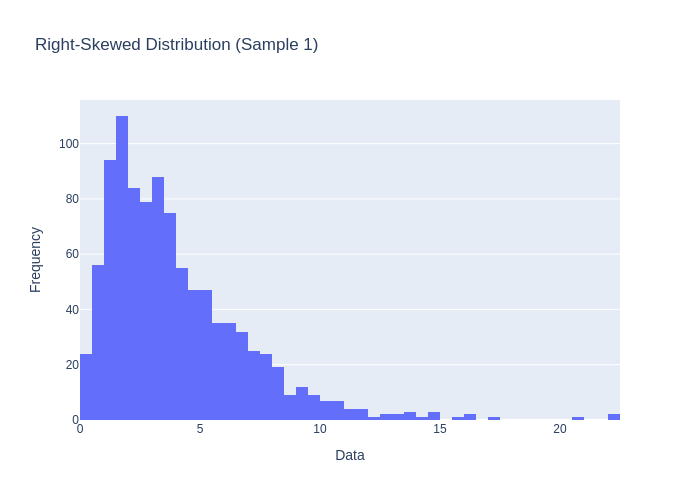

Mean of Sample 1 (Right-Skewed): 4.005716196985609
Median of Sample 1 (Right-Skewed): 3.280456962350181


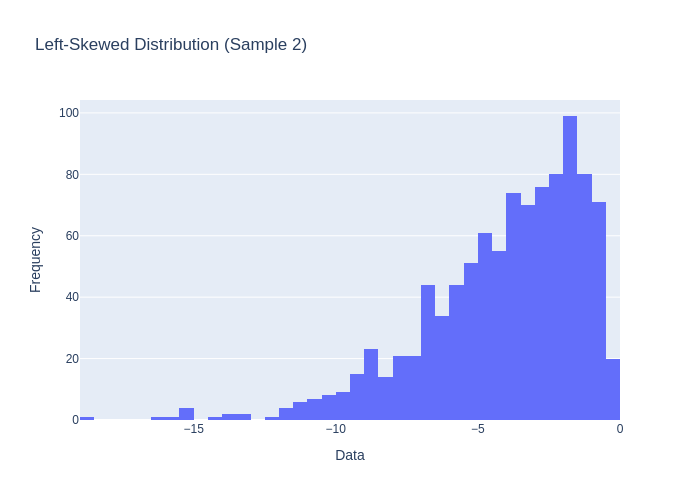

Mean of Sample 2 (Left-Skewed): -4.101997262346314
Median of Sample 2 (Left-Skewed): -3.510186405522276
In the right-skewed distribution (Sample 1), the mean is greater than the median.
In the left-skewed distribution (Sample 2), the mean is less than the median.


In [14]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate right-skewed data (Gamma distribution)
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create histogram for right-skewed data (sample1)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution (Sample 1)")
fig1.update_layout(xaxis_title="Data", yaxis_title="Frequency")
fig1.show(renderer="png")

# Calculate and print mean and median for right-skewed data
mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)
print(f"Mean of Sample 1 (Right-Skewed): {mean1}")
print(f"Median of Sample 1 (Right-Skewed): {median1}")

# Generate left-skewed data by negating the right-skewed data
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create histogram for left-skewed data (sample2)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution (Sample 2)")
fig2.update_layout(xaxis_title="Data", yaxis_title="Frequency")
fig2.show(renderer="png")

# Calculate and print mean and median for left-skewed data
mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)
print(f"Mean of Sample 2 (Left-Skewed): {mean2}")
print(f"Median of Sample 2 (Left-Skewed): {median2}")

# Summary comment on the skewness impact
if mean1 > median1:
    print("In the right-skewed distribution (Sample 1), the mean is greater than the median.")
if mean2 < median2:
    print("In the left-skewed distribution (Sample 2), the mean is less than the median.")


Summary provided by ChatGPT: 

Here's a summary of our conversation so far:

1. **Mean vs. Median**:
   - The **mean** is the average of all data points and is sensitive to outliers (extreme values).
   - The **median** is the middle value when data is sorted and is resistant to outliers.

2. **Skewness**:
   - **Right-skewed (positive skewness)**: Most values are concentrated on the left, with a long tail on the right. The **mean is greater than the median** because high outliers pull the mean upward.
   - **Left-skewed (negative skewness)**: Most values are concentrated on the right, with a long tail on the left. The **mean is less than the median** because low outliers pull the mean downward.

3. **Code Explanation**:
   - The initial code generates right-skewed data (`sample1`) using a gamma distribution and calculates the mean and median.
   - It also generates left-skewed data (`sample2`) by negating the gamma-distributed values.
   - The mean and median for both datasets are compared to highlight how the mean is affected by skewness.

4. **Why This Happens**:
   - In skewed distributions, the **mean is pulled in the direction of the tail** because it considers all values, while the **median stays closer to the bulk of the data**, unaffected by extreme values.

5. **Extended Code**:
   - The code was extended to visualize both right-skewed and left-skewed data using histograms and to calculate the mean and median for both datasets. The results demonstrate that the mean is greater than the median in right-skewed data and less than the median in left-skewed data.

This conversation covers the theory behind skewness, the behavior of mean and median in such distributions, and the demonstration through code.

https://chatgpt.com/share/66f61775-1de4-8006-ba05-111a00fe302f

6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

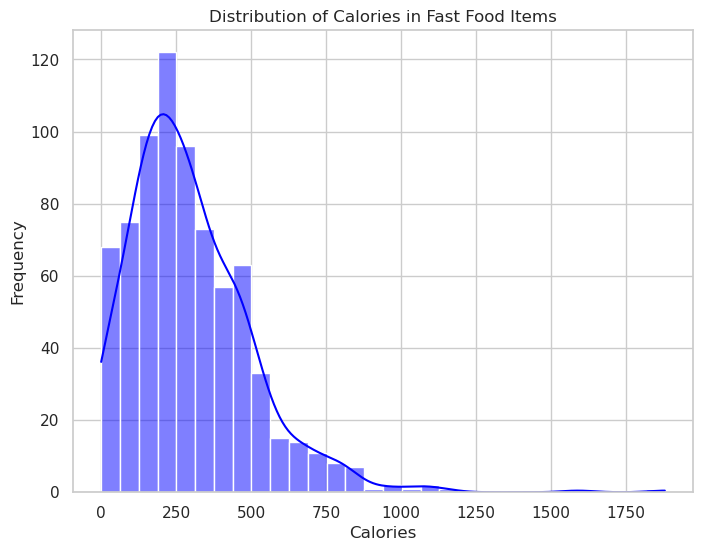

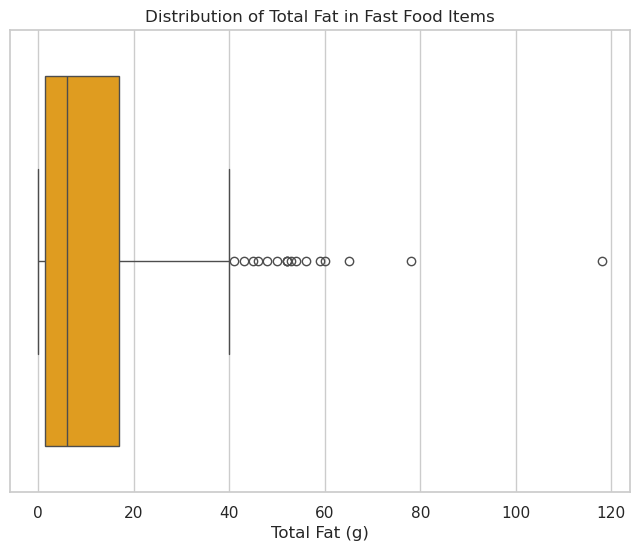

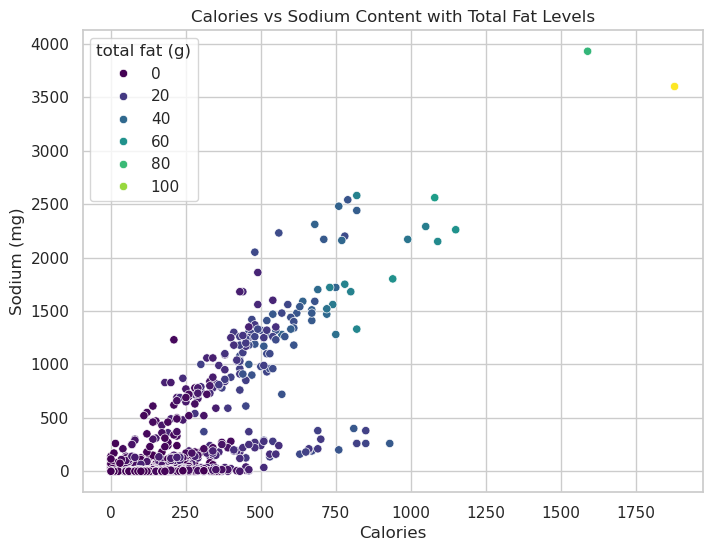

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Clean the 'total fat (g)' column (convert to numeric, forcing errors to NaN)
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')

# Set plot style
sns.set(style="whitegrid")

# 1. Histogram of calories
plt.figure(figsize=(8, 6))
sns.histplot(df['calories'], kde=True, color='blue', bins=30)
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot for total fat
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total fat (g)'], color='orange')
plt.title('Distribution of Total Fat in Fast Food Items')
plt.xlabel('Total Fat (g)')
plt.show()

# 3. Scatter plot: Calories vs Sodium with Total Fat levels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='calories', y='sodium (mg)', data=df, hue='total fat (g)', palette='viridis')
plt.title('Calories vs Sodium Content with Total Fat Levels')
plt.xlabel('Calories')
plt.ylabel('Sodium (mg)')
plt.show()


Summary provided by ChatGPT: So far, you've asked for help with loading and analyzing an interesting dataset for a tutorial activity, possibly from TidyTuesday. You provided a fast-food nutritional dataset, which I have successfully loaded for you. The dataset includes various columns related to nutrition, such as calories, total fat, saturated fat, carbohydrates, sodium, protein, and other nutritional values for fast food items.

The next step would be to generate some summary statistics or visualizations. You also mentioned that in future activities, group members will determine whose dataset will be presented. Let me know if you'd like to explore specific aspects of the data further!

https://chatgpt.com/share/66f61975-9b70-8006-b13e-95ef80b37f61


7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

In [16]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [17]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Animated GDP and population over decades'),
    html.P("Select an animation:"),
    dcc.RadioItems(
        id='selection',
        options=["GDP - Scatter", "Population - Bar"],
        value='GDP - Scatter',
    ),
    dcc.Loading(dcc.Graph(id="graph"), type="cube")
])


@app.callback(
    Output("graph", "figure"), 
    Input("selection", "value"))
def display_animated_graph(selection):
    df = px.data.gapminder() # replace with your own data source
    animations = {
        'GDP - Scatter': px.scatter(
            df, x="gdpPercap", y="lifeExp", animation_frame="year", 
            animation_group="country", size="pop", color="continent", 
            hover_name="country", log_x=True, size_max=55, 
            range_x=[100,100000], range_y=[25,90]),
        'Population - Bar': px.bar(
            df, x="continent", y="pop", color="continent", 
            animation_frame="year", animation_group="country", 
            range_y=[0,4000000000]),
    }
    return animations[selection]


app.run_server(debug=True)
Download


ModuleNotFoundError: No module named 'dash'

In [18]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

In [19]:
"updatemenus": [{"type": "buttons",
                 "buttons": [{"label": "Your Label",
                              "method": "animate",
                              "args": [See Below]}]}]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3522804520.py, line 4)

In [20]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

In [21]:
import plotly.graph_objects as go
import numpy as np
# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 25
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=[xx[0]], y=[yy[0]],
                     mode="markers",
                     marker=dict(color="red", size=10))])
fig.update_layout(width=600, height=450,
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", title_x=0.5, 
        updatemenus = [dict(type = "buttons",
        buttons = [
            dict(
                args = [None, {"frame": {"duration": 10, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 10}}],
                label = "Play",
                method = "animate",
                 
                )])])
       
fig.update(frames=[go.Frame(
                        data=[go.Scatter(
                                   x=[xx[k]],
                                   y=[yy[k]])],
                        traces=[1]) # fig.data[1] is updated by each frame
        for k in range(N)])

fig.show()

In [22]:
import plotly.graph_objects as go

import numpy as np


# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2
vx = 1 + 2 * s
vy = 1 - 2 * s  # v=(vx, vy) is the velocity
speed = np.sqrt(vx ** 2 + vy ** 2)
ux = vx / speed  # (ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy = vy / speed

xend = xx + ux  # end coordinates for the unit tangent vector at (xx, yy)
yend = yy + uy

xnoe = xx - uy  # end coordinates for the unit normal vector at (xx,yy)
ynoe = yy + ux


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     name="frame",
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     name="curve",
                     mode="lines",
                     line=dict(width=2, color="blue"))
          ],
    layout=go.Layout(width=600, height=600,
                     xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title="Moving Frenet Frame Along a Planar Curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None])])]),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], xend[k], None, xx[k], xnoe[k]],
            y=[yy[k], yend[k], None, yy[k], ynoe[k]],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(N)]
)

fig.show()

In [23]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()

8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

In [25]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="", y="", animation_frame="", animation_group="",
                 size="", color="", hover_name="",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['year', 'name', 'percent', 'sex', 'rank', 'percent change', 'percentage change'] but received: 

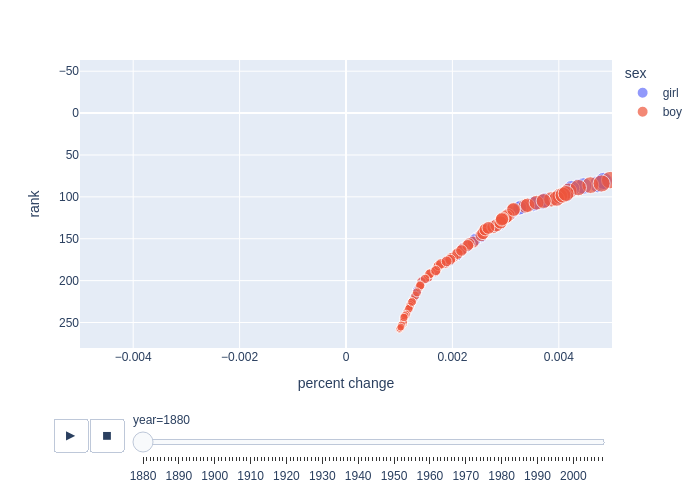

In [24]:
import pandas as pd
import plotly.express as px

# Load the data
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Rank the names by year based on percentage
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the percent change column
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort values by year and filter to common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]

# Plot the scatter plot
fig = px.scatter(
    bn, 
    x="percent change", 
    y="rank", 
    animation_frame="year", 
    animation_group="name", 
    size="percent", 
    color="sex", 
    hover_name="name", 
    size_max=50, 
    range_x=[-0.005, 0.005]
)

# Reverse the y-axis to show rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Display the plot
fig.show(renderer="png")


Summary provided by ChatGPT: Here’s a summary of our conversation so far:

- You provided a dataset on baby names and their popularity over time and asked for modifications to a scatter plot.
- I helped you rewrite a `plotly.express` (`px.scatter`) function that visualizes changes in baby name popularity by adjusting several parameters, including:
  - `x` was set to "percent change" (indicating the year-over-year change in popularity),
  - `y` was set to "rank" (showing the ranking of names),
  - `size` was set to "percent" (indicating the proportion of babies given that name),
  - `color` was set to "sex",
  - The animation was based on "year", and the hover label was set to display the "name".
  - Other adjustments were made to the axes and scatter plot, like setting `size_max` to 50, `range_x` to [-0.005, 0.005], removing `log_x=True`, and ensuring the y-axis was reversed so rank 1 appears at the top.

Would you like me to add anything else?

https://chatgpt.com/share/66f61c67-1264-8006-801a-42e1885059eb

9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

YES